In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Regression
Predict the cured, deaths and confirmed cases.

Based on that we can predict the overall condition to the state.
Improved or degraded.

In [5]:
# Covid 19 India data
df = pd.read_csv("../Data/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
# Statewise Testing Details data
df1 = pd.read_csv("../Data/StatewiseTestingDetails.csv")
df1.head

<bound method NDFrame.head of              Date                        State  TotalSamples Negative  \
0      2020-04-17  Andaman and Nicobar Islands        1403.0     1210   
1      2020-04-24  Andaman and Nicobar Islands        2679.0      NaN   
2      2020-04-27  Andaman and Nicobar Islands        2848.0      NaN   
3      2020-05-01  Andaman and Nicobar Islands        3754.0      NaN   
4      2020-05-16  Andaman and Nicobar Islands        6677.0      NaN   
...           ...                          ...           ...      ...   
16331  2021-08-06                  West Bengal    15999961.0      NaN   
16332  2021-08-07                  West Bengal    16045662.0      NaN   
16333  2021-08-08                  West Bengal    16092192.0      NaN   
16334  2021-08-09                  West Bengal    16122345.0      NaN   
16335  2021-08-10                  West Bengal    16162814.0      NaN   

       Positive  
0          12.0  
1          27.0  
2          33.0  
3          33.0  
4  

In [7]:
# Covid vaccine statewise data
df2 = pd.read_csv("../Data/covid_vaccine_statewise.csv")
df2.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16-01-2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17-01-2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18-01-2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19-01-2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20-01-2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


# Data Preparation and Cleaning

In [8]:
df.shape

(18110, 9)

In [9]:
# Function to replace names
def replace_names(old, new):
    df["State/UnionTerritory"].replace(old, new, inplace=True)

In [10]:
states = df["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Cases being reassigned to states', 'Sikkim', 'Daman & Diu', 'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****', 'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka', 'Maharashtra***']
Total unique states and union territories = 46


In [11]:
# Cleaning data 
# Replacing incorrect names of States

replace_names("Maharashtra***", "Maharashtra")
replace_names("Madhya Pradesh***", "Madhya Pradesh")
replace_names("Bihar****", "Bihar")
replace_names("Dadra and Nagar Haveli", "Dadra and Nagar Haveli and Daman and Diu")
replace_names("Daman & Diu", "Dadra and Nagar Haveli and Daman and Diu")
replace_names("Himanchal Pradesh", "Himachal Pradesh")
replace_names("Telengana", "Telangana")
replace_names("Karanataka", "Karnataka")


states = df["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Cases being reassigned to states', 'Sikkim', 'Lakshadweep']
Total unique states and union territories = 38


In [12]:
# Checking for 'Unassigned' and 'Cases being reassigned to states rows' in the data
print('Cases being reassigned to states =', len(df[df['State/UnionTerritory'] == 'Cases being reassigned to states']))
print('Unassigned =', len(df[df['State/UnionTerritory'] == 'Unassigned']))

Cases being reassigned to states = 60
Unassigned = 3


In [13]:
# Dropping 'Unassigned' and 'Cases being reassigned to states' rows from the data
indexes1 = df[df['State/UnionTerritory'] == 'Cases being reassigned to states'].index
indexes2 = df[df['State/UnionTerritory'] == 'Unassigned'].index
df.drop(indexes1, inplace=True)
df.drop(indexes2, inplace=True)

In [14]:
states = df["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Lakshadweep']
Total unique states and union territories = 36


In [15]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sno,18047.0,NaN,NaN,NaN,9076.41813,5224.916438,1.0,4575.5,9087.0,13598.5,18110.0
Date,18047,560,2021-08-11,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,18047,7,8:00 AM,16412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State/UnionTerritory,18047,36,Kerala,560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConfirmedIndianNational,18047,62,-,17601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConfirmedForeignNational,18047,12,-,17601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cured,18047.0,NaN,NaN,NaN,279610.209564,615742.451962,0.0,3392.0,33924.0,280679.0,6159676.0
Deaths,18047.0,NaN,NaN,NaN,4066.548734,10935.489348,0.0,34.0,598.0,3669.5,134201.0
Confirmed,18047.0,NaN,NaN,NaN,302063.110822,657060.375285,0.0,4387.0,40269.0,301280.5,6363442.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18047 non-null  int64 
 1   Date                      18047 non-null  object
 2   Time                      18047 non-null  object
 3   State/UnionTerritory      18047 non-null  object
 4   ConfirmedIndianNational   18047 non-null  object
 5   ConfirmedForeignNational  18047 non-null  object
 6   Cured                     18047 non-null  int64 
 7   Deaths                    18047 non-null  int64 
 8   Confirmed                 18047 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


In [17]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [18]:
# taking the dates from the dataframe 
dates = df.iloc[:, 1].values
for i in range(5):
    print(dates[i])

2020-01-30
2020-01-31
2020-02-01
2020-02-02
2020-02-03


In [19]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [20]:
df.shape

(18047, 9)

In [21]:
# creating condition column by checking the 
# confirmed cases based on past 2 weeks
break_point = 0
condition = []
graph = []
last_week = {}
for state in states:
    last_week[state] = states.count(state) - 1
last_week

{'Kerala': 0,
 'Telangana': 0,
 'Delhi': 0,
 'Rajasthan': 0,
 'Uttar Pradesh': 0,
 'Haryana': 0,
 'Ladakh': 0,
 'Tamil Nadu': 0,
 'Karnataka': 0,
 'Maharashtra': 0,
 'Punjab': 0,
 'Jammu and Kashmir': 0,
 'Andhra Pradesh': 0,
 'Uttarakhand': 0,
 'Odisha': 0,
 'Puducherry': 0,
 'West Bengal': 0,
 'Chhattisgarh': 0,
 'Chandigarh': 0,
 'Gujarat': 0,
 'Himachal Pradesh': 0,
 'Madhya Pradesh': 0,
 'Bihar': 0,
 'Manipur': 0,
 'Mizoram': 0,
 'Andaman and Nicobar Islands': 0,
 'Goa': 0,
 'Assam': 0,
 'Jharkhand': 0,
 'Arunachal Pradesh': 0,
 'Tripura': 0,
 'Nagaland': 0,
 'Meghalaya': 0,
 'Dadra and Nagar Haveli and Daman and Diu': 0,
 'Sikkim': 0,
 'Lakshadweep': 0}

In [22]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [23]:
dates = df.Date.unique()
print(dates.shape)
print(dates)
datesAll = df.Date.values
print(datesAll.shape)
print(datesAll)

(560,)
['2020-01-30' '2020-01-31' '2020-02-01' '2020-02-02' '2020-02-03'
 '2020-02-04' '2020-02-05' '2020-02-06' '2020-02-07' '2020-02-08'
 '2020-02-09' '2020-02-10' '2020-02-11' '2020-02-12' '2020-02-13'
 '2020-02-14' '2020-02-15' '2020-02-16' '2020-02-17' '2020-02-18'
 '2020-02-19' '2020-02-20' '2020-02-21' '2020-02-22' '2020-02-23'
 '2020-02-24' '2020-02-25' '2020-02-26' '2020-02-27' '2020-02-28'
 '2020-02-29' '2020-03-01' '2020-03-02' '2020-03-03' '2020-03-04'
 '2020-03-05' '2020-03-06' '2020-03-07' '2020-03-08' '2020-03-09'
 '2020-03-10' '2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14'
 '2020-03-15' '2020-03-16' '2020-03-17' '2020-03-18' '2020-03-19'
 '2020-03-20' '2020-03-21' '2020-03-22' '2020-03-23' '2020-03-24'
 '2020-03-25' '2020-03-26' '2020-03-27' '2020-03-28' '2020-03-29'
 '2020-03-30' '2020-03-31' '2020-04-01' '2020-04-02' '2020-04-03'
 '2020-04-04' '2020-04-05' '2020-04-06' '2020-04-07' '2020-04-08'
 '2020-04-09' '2020-04-10' '2020-04-11' '2020-04-12' '2020-04-13'
 '2

In [24]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999


In [25]:
sum = df.Confirmed.sum()
sum

5451332961

In [26]:
# creating condition column by checking the 
# confirmed cases based on past 2 weeks
break_point = 0
condition = []
graph = []
day_wise = {}
for state in states:
    day_wise[state] = states.count(state) - 1
day_wise

{'Kerala': 0,
 'Telangana': 0,
 'Delhi': 0,
 'Rajasthan': 0,
 'Uttar Pradesh': 0,
 'Haryana': 0,
 'Ladakh': 0,
 'Tamil Nadu': 0,
 'Karnataka': 0,
 'Maharashtra': 0,
 'Punjab': 0,
 'Jammu and Kashmir': 0,
 'Andhra Pradesh': 0,
 'Uttarakhand': 0,
 'Odisha': 0,
 'Puducherry': 0,
 'West Bengal': 0,
 'Chhattisgarh': 0,
 'Chandigarh': 0,
 'Gujarat': 0,
 'Himachal Pradesh': 0,
 'Madhya Pradesh': 0,
 'Bihar': 0,
 'Manipur': 0,
 'Mizoram': 0,
 'Andaman and Nicobar Islands': 0,
 'Goa': 0,
 'Assam': 0,
 'Jharkhand': 0,
 'Arunachal Pradesh': 0,
 'Tripura': 0,
 'Nagaland': 0,
 'Meghalaya': 0,
 'Dadra and Nagar Haveli and Daman and Diu': 0,
 'Sikkim': 0,
 'Lakshadweep': 0}

In [27]:
day_wise_confirmed = []
day_wise_confirmed.append(day_wise.copy())
dates = df.Date.unique()
dates

array(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-

In [28]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [29]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


# Data Visualisation

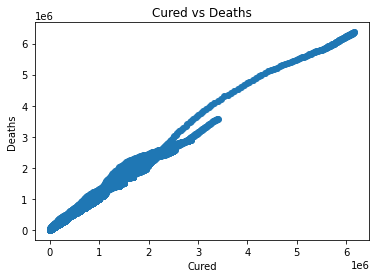

<Figure size 1440x2880 with 0 Axes>

In [30]:
plt.scatter(df.Cured, df.Confirmed)
plt.title('Cured' +' vs Deaths')
plt.ylabel('Deaths')
plt.xlabel('Cured')
plt.figure(figsize=(20,40))
plt.show()

In [31]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [32]:
continuous_columns = ['Date', 'Time', 'Cured', 'Deaths', 'Confirmed']

corr = df[continuous_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,Cured,Deaths,Confirmed
Cured,1.000000,0.917492,0.997749
Deaths,0.917492,1.000000,0.918308
Confirmed,0.997749,0.918308,1.000000


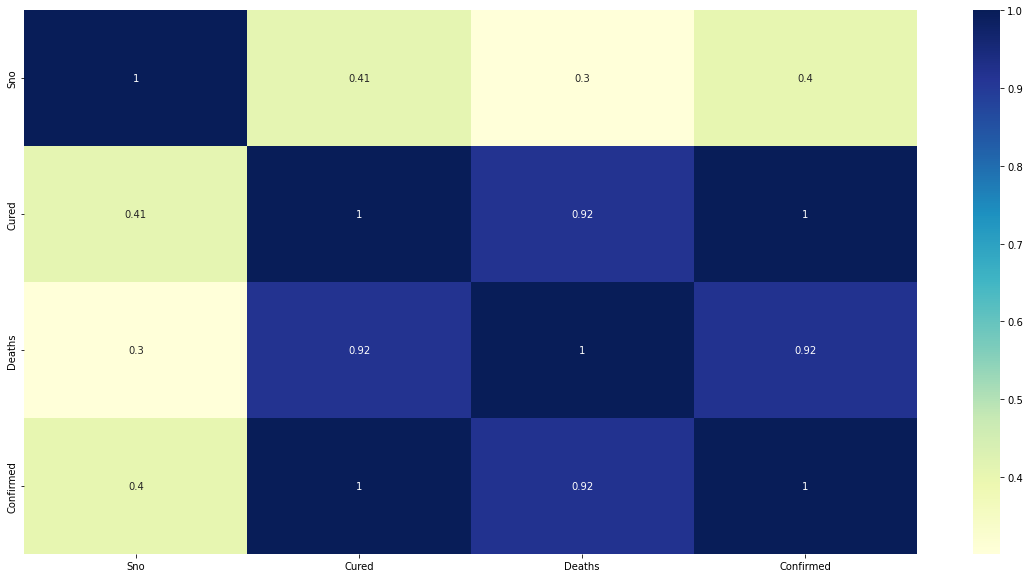

In [33]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

# Splitting and Scaling Data

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [35]:
df.drop('Time', axis = 1, inplace = True)
df.drop('ConfirmedIndianNational', axis = 1, inplace = True)
df.drop('ConfirmedForeignNational', axis = 1, inplace = True)
df.drop('Sno', axis = 1, inplace = True)

In [36]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [37]:
x = df.iloc[:, :-1].values # Rest of the features
y = df.iloc[:, -1].values # Confirmed
print(y)

[      1       1       2 ...  342462 1708812 1534999]


In [38]:
dfNew = pd.get_dummies(df, drop_first=True)
dfNew.head(400)

,Cured,Deaths,Confirmed,Date_2020-01-31,Date_2020-02-01,Date_2020-02-02,Date_2020-02-03,Date_2020-02-04,Date_2020-02-05,Date_2020-02-06,Date_2020-02-07,Date_2020-02-08,Date_2020-02-09,Date_2020-02-10,Date_2020-02-11,Date_2020-02-12,Date_2020-02-13,Date_2020-02-14,Date_2020-02-15,Date_2020-02-16,Date_2020-02-17,Date_2020-02-18,Date_2020-02-19,Date_2020-02-20,Date_2020-02-21,Date_2020-02-22,Date_2020-02-23,Date_2020-02-24,Date_2020-02-25,Date_2020-02-26,Date_2020-02-27,Date_2020-02-28,Date_2020-02-29,Date_2020-03-01,Date_2020-03-02,Date_2020-03-03,Date_2020-03-04,Date_2020-03-05,Date_2020-03-06,Date_2020-03-07,Date_2020-03-08,Date_2020-03-09,Date_2020-03-10,Date_2020-03-11,Date_2020-03-12,Date_2020-03-13,Date_2020-03-14,Date_2020-03-15,Date_2020-03-16,Date_2020-03-17,Date_2020-03-18,Date_2020-03-19,Date_2020-03-20,Date_2020-03-21,Date_2020-03-22,Date_2020-03-23,Date_2020-03-24,Date_2020-03-25,Date_2020-03-26,Date_2020-03-27,Date_2020-03-28,Date_2020-03-29,Date_2020-03-30,Date_2020-03-31,Date_2020-04-01,Date_2020-04-02,Date_2020-04-03,Date_2020-04-04,Date_2020-04-05,Date_2020-04-06,Date_2020-04-07,Date_2020-04-08,Date_2020-04-09,Date_2020-04-10,Date_2020-04-11,Date_2020-04-12,Date_2020-04-13,Date_2020-04-14,Date_2020-04-15,Date_2020-04-16,Date_2020-04-17,Date_2020-04-18,Date_2020-04-19,Date_2020-04-20,Date_2020-04-21,Date_2020-04-22,Date_2020-04-23,Date_2020-04-24,Date_2020-04-25,Date_2020-04-26,Date_2020-04-27,Date_2020-04-28,Date_2020-04-29,Date_2020-04-30,Date_2020-05-01,Date_2020-05-02,Date_2020-05-03,Date_2020-05-04,Date_2020-05-05,Date_2020-05-06,Date_2020-05-07,Date_2020-05-08,Date_2020-05-09,Date_2020-05-10,Date_2020-05-11,Date_2020-05-12,Date_2020-05-13,Date_2020-05-14,Date_2020-05-15,Date_2020-05-16,Date_2020-05-17,Date_2020-05-18,Date_2020-05-19,Date_2020-05-20,Date_2020-05-21,Date_2020-05-22,Date_2020-05-23,Date_2020-05-24,Date_2020-05-25,Date_2020-05-26,Date_2020-05-27,Date_2020-05-28,Date_2020-05-29,Date_2020-05-30,Date_2020-05-31,Date_2020-06-01,Date_2020-06-02,Date_2020-06-03,Date_2020-06-04,Date_2020-06-05,Date_2020-06-06,Date_2020-06-07,Date_2020-06-08,Date_2020-06-09,Date_2020-06-10,Date_2020-06-11,Date_2020-06-12,Date_2020-06-13,Date_2020-06-14,Date_2020-06-15,Date_2020-06-16,Date_2020-06-17,Date_2020-06-18,Date_2020-06-19,Date_2020-06-20,Date_2020-06-21,Date_2020-06-22,Date_2020-06-23,Date_2020-06-24,Date_2020-06-25,Date_2020-06-26,Date_2020-06-27,Date_2020-06-28,Date_2020-06-29,Date_2020-06-30,Date_2020-07-01,Date_2020-07-02,Date_2020-07-03,Date_2020-07-04,Date_2020-07-05,Date_2020-07-06,Date_2020-07-07,Date_2020-07-08,Date_2020-07-09,Date_2020-07-10,Date_2020-07-11,Date_2020-07-12,Date_2020-07-13,Date_2020-07-14,Date_2020-07-15,Date_2020-07-16,Date_2020-07-17,Date_2020-07-18,Date_2020-07-19,Date_2020-07-20,Date_2020-07-21,Date_2020-07-22,Date_2020-07-23,Date_2020-07-24,Date_2020-07-25,Date_2020-07-26,Date_2020-07-27,Date_2020-07-28,Date_2020-07-29,Date_2020-07-30,Date_2020-07-31,Date_2020-08-01,Date_2020-08-02,Date_2020-08-03,Date_2020-08-04,Date_2020-08-05,Date_2020-08-06,Date_2020-08-07,Date_2020-08-08,Date_2020-08-09,Date_2020-08-10,Date_2020-08-11,Date_2020-08-12,Date_2020-08-13,Date_2020-08-14,Date_2020-08-15,Date_2020-08-16,Date_2020-08-17,Date_2020-08-18,Date_2020-08-19,Date_2020-08-20,Date_2020-08-21,Date_2020-08-22,Date_2020-08-23,Date_2020-08-24,Date_2020-08-25,Date_2020-08-26,Date_2020-08-27,Date_2020-08-28,Date_2020-08-29,Date_2020-08-30,Date_2020-08-31,Date_2020-09-01,Date_2020-09-02,Date_2020-09-03,Date_2020-09-04,Date_2020-09-05,Date_2020-09-06,Date_2020-09-07,Date_2020-09-08,Date_2020-09-09,Date_2020-09-10,Date_2020-09-11,Date_2020-09-12,Date_2020-09-13,Date_2020-09-14,Date_2020-09-15,Date_2020-09-16,Date_2020-09-17,Date_2020-09-18,Date_2020-09-19,Date_2020-09-20,Date_2020-09-21,Date_2020-09-22,Date_2020-09-23,Date_2020-09-24,Date_2020-09-25,Date_2020-09-26,Date_2020-09-27,Date_2020-09-28,Date_2020-09-29,Date_2020-09-30,Date_2020-10-01,Date_2020-10-02,Date_2020-10-03,Date_2020-10-04,Date_202

In [39]:
x = dfNew.iloc[:, :-4].values
print(x)

[[      0       0       1 ...       0       0       0]
 [      0       0       1 ...       0       0       0]
 [      0       0       2 ...       0       0       0]
 ...
 [ 334650    7368  342462 ...       0       0       0]
 [1685492   22775 1708812 ...       0       0       0]
 [1506532   18252 1534999 ...       0       0       0]]


In [40]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.25)
# y_train
df_train, df_test = train_test_split(dfNew, train_size= 0.7, test_size= 0.3, random_state=1)
df_train

,Cured,Deaths,Confirmed,Date_2020-01-31,Date_2020-02-01,Date_2020-02-02,Date_2020-02-03,Date_2020-02-04,Date_2020-02-05,Date_2020-02-06,Date_2020-02-07,Date_2020-02-08,Date_2020-02-09,Date_2020-02-10,Date_2020-02-11,Date_2020-02-12,Date_2020-02-13,Date_2020-02-14,Date_2020-02-15,Date_2020-02-16,Date_2020-02-17,Date_2020-02-18,Date_2020-02-19,Date_2020-02-20,Date_2020-02-21,Date_2020-02-22,Date_2020-02-23,Date_2020-02-24,Date_2020-02-25,Date_2020-02-26,Date_2020-02-27,Date_2020-02-28,Date_2020-02-29,Date_2020-03-01,Date_2020-03-02,Date_2020-03-03,Date_2020-03-04,Date_2020-03-05,Date_2020-03-06,Date_2020-03-07,Date_2020-03-08,Date_2020-03-09,Date_2020-03-10,Date_2020-03-11,Date_2020-03-12,Date_2020-03-13,Date_2020-03-14,Date_2020-03-15,Date_2020-03-16,Date_2020-03-17,Date_2020-03-18,Date_2020-03-19,Date_2020-03-20,Date_2020-03-21,Date_2020-03-22,Date_2020-03-23,Date_2020-03-24,Date_2020-03-25,Date_2020-03-26,Date_2020-03-27,Date_2020-03-28,Date_2020-03-29,Date_2020-03-30,Date_2020-03-31,Date_2020-04-01,Date_2020-04-02,Date_2020-04-03,Date_2020-04-04,Date_2020-04-05,Date_2020-04-06,Date_2020-04-07,Date_2020-04-08,Date_2020-04-09,Date_2020-04-10,Date_2020-04-11,Date_2020-04-12,Date_2020-04-13,Date_2020-04-14,Date_2020-04-15,Date_2020-04-16,Date_2020-04-17,Date_2020-04-18,Date_2020-04-19,Date_2020-04-20,Date_2020-04-21,Date_2020-04-22,Date_2020-04-23,Date_2020-04-24,Date_2020-04-25,Date_2020-04-26,Date_2020-04-27,Date_2020-04-28,Date_2020-04-29,Date_2020-04-30,Date_2020-05-01,Date_2020-05-02,Date_2020-05-03,Date_2020-05-04,Date_2020-05-05,Date_2020-05-06,Date_2020-05-07,Date_2020-05-08,Date_2020-05-09,Date_2020-05-10,Date_2020-05-11,Date_2020-05-12,Date_2020-05-13,Date_2020-05-14,Date_2020-05-15,Date_2020-05-16,Date_2020-05-17,Date_2020-05-18,Date_2020-05-19,Date_2020-05-20,Date_2020-05-21,Date_2020-05-22,Date_2020-05-23,Date_2020-05-24,Date_2020-05-25,Date_2020-05-26,Date_2020-05-27,Date_2020-05-28,Date_2020-05-29,Date_2020-05-30,Date_2020-05-31,Date_2020-06-01,Date_2020-06-02,Date_2020-06-03,Date_2020-06-04,Date_2020-06-05,Date_2020-06-06,Date_2020-06-07,Date_2020-06-08,Date_2020-06-09,Date_2020-06-10,Date_2020-06-11,Date_2020-06-12,Date_2020-06-13,Date_2020-06-14,Date_2020-06-15,Date_2020-06-16,Date_2020-06-17,Date_2020-06-18,Date_2020-06-19,Date_2020-06-20,Date_2020-06-21,Date_2020-06-22,Date_2020-06-23,Date_2020-06-24,Date_2020-06-25,Date_2020-06-26,Date_2020-06-27,Date_2020-06-28,Date_2020-06-29,Date_2020-06-30,Date_2020-07-01,Date_2020-07-02,Date_2020-07-03,Date_2020-07-04,Date_2020-07-05,Date_2020-07-06,Date_2020-07-07,Date_2020-07-08,Date_2020-07-09,Date_2020-07-10,Date_2020-07-11,Date_2020-07-12,Date_2020-07-13,Date_2020-07-14,Date_2020-07-15,Date_2020-07-16,Date_2020-07-17,Date_2020-07-18,Date_2020-07-19,Date_2020-07-20,Date_2020-07-21,Date_2020-07-22,Date_2020-07-23,Date_2020-07-24,Date_2020-07-25,Date_2020-07-26,Date_2020-07-27,Date_2020-07-28,Date_2020-07-29,Date_2020-07-30,Date_2020-07-31,Date_2020-08-01,Date_2020-08-02,Date_2020-08-03,Date_2020-08-04,Date_2020-08-05,Date_2020-08-06,Date_2020-08-07,Date_2020-08-08,Date_2020-08-09,Date_2020-08-10,Date_2020-08-11,Date_2020-08-12,Date_2020-08-13,Date_2020-08-14,Date_2020-08-15,Date_2020-08-16,Date_2020-08-17,Date_2020-08-18,Date_2020-08-19,Date_2020-08-20,Date_2020-08-21,Date_2020-08-22,Date_2020-08-23,Date_2020-08-24,Date_2020-08-25,Date_2020-08-26,Date_2020-08-27,Date_2020-08-28,Date_2020-08-29,Date_2020-08-30,Date_2020-08-31,Date_2020-09-01,Date_2020-09-02,Date_2020-09-03,Date_2020-09-04,Date_2020-09-05,Date_2020-09-06,Date_2020-09-07,Date_2020-09-08,Date_2020-09-09,Date_2020-09-10,Date_2020-09-11,Date_2020-09-12,Date_2020-09-13,Date_2020-09-14,Date_2020-09-15,Date_2020-09-16,Date_2020-09-17,Date_2020-09-18,Date_2020-09-19,Date_2020-09-20,Date_2020-09-21,Date_2020-09-22,Date_2020-09-23,Date_2020-09-24,Date_2020-09-25,Date_2020-09-26,Date_2020-09-27,Date_2020-09-28,Date_2020-09-29,Date_2020-09-30,Date_2020-10-01,Date_2020-10-02,Date_2020-10-03,Date_2020-10-04,Date_202

In [41]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# num_vars = ['Cured', 'Deaths', 'Confirmed']
# df_train[num_vars] = scaler.fit_transform(df_train[num_vars].copy())

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['Cured', 'Deaths', 'Confirmed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars].copy())

In [43]:
df_train.head()

,Cured,Deaths,Confirmed,Date_2020-01-31,Date_2020-02-01,Date_2020-02-02,Date_2020-02-03,Date_2020-02-04,Date_2020-02-05,Date_2020-02-06,Date_2020-02-07,Date_2020-02-08,Date_2020-02-09,Date_2020-02-10,Date_2020-02-11,Date_2020-02-12,Date_2020-02-13,Date_2020-02-14,Date_2020-02-15,Date_2020-02-16,Date_2020-02-17,Date_2020-02-18,Date_2020-02-19,Date_2020-02-20,Date_2020-02-21,Date_2020-02-22,Date_2020-02-23,Date_2020-02-24,Date_2020-02-25,Date_2020-02-26,Date_2020-02-27,Date_2020-02-28,Date_2020-02-29,Date_2020-03-01,Date_2020-03-02,Date_2020-03-03,Date_2020-03-04,Date_2020-03-05,Date_2020-03-06,Date_2020-03-07,Date_2020-03-08,Date_2020-03-09,Date_2020-03-10,Date_2020-03-11,Date_2020-03-12,Date_2020-03-13,Date_2020-03-14,Date_2020-03-15,Date_2020-03-16,Date_2020-03-17,Date_2020-03-18,Date_2020-03-19,Date_2020-03-20,Date_2020-03-21,Date_2020-03-22,Date_2020-03-23,Date_2020-03-24,Date_2020-03-25,Date_2020-03-26,Date_2020-03-27,Date_2020-03-28,Date_2020-03-29,Date_2020-03-30,Date_2020-03-31,Date_2020-04-01,Date_2020-04-02,Date_2020-04-03,Date_2020-04-04,Date_2020-04-05,Date_2020-04-06,Date_2020-04-07,Date_2020-04-08,Date_2020-04-09,Date_2020-04-10,Date_2020-04-11,Date_2020-04-12,Date_2020-04-13,Date_2020-04-14,Date_2020-04-15,Date_2020-04-16,Date_2020-04-17,Date_2020-04-18,Date_2020-04-19,Date_2020-04-20,Date_2020-04-21,Date_2020-04-22,Date_2020-04-23,Date_2020-04-24,Date_2020-04-25,Date_2020-04-26,Date_2020-04-27,Date_2020-04-28,Date_2020-04-29,Date_2020-04-30,Date_2020-05-01,Date_2020-05-02,Date_2020-05-03,Date_2020-05-04,Date_2020-05-05,Date_2020-05-06,Date_2020-05-07,Date_2020-05-08,Date_2020-05-09,Date_2020-05-10,Date_2020-05-11,Date_2020-05-12,Date_2020-05-13,Date_2020-05-14,Date_2020-05-15,Date_2020-05-16,Date_2020-05-17,Date_2020-05-18,Date_2020-05-19,Date_2020-05-20,Date_2020-05-21,Date_2020-05-22,Date_2020-05-23,Date_2020-05-24,Date_2020-05-25,Date_2020-05-26,Date_2020-05-27,Date_2020-05-28,Date_2020-05-29,Date_2020-05-30,Date_2020-05-31,Date_2020-06-01,Date_2020-06-02,Date_2020-06-03,Date_2020-06-04,Date_2020-06-05,Date_2020-06-06,Date_2020-06-07,Date_2020-06-08,Date_2020-06-09,Date_2020-06-10,Date_2020-06-11,Date_2020-06-12,Date_2020-06-13,Date_2020-06-14,Date_2020-06-15,Date_2020-06-16,Date_2020-06-17,Date_2020-06-18,Date_2020-06-19,Date_2020-06-20,Date_2020-06-21,Date_2020-06-22,Date_2020-06-23,Date_2020-06-24,Date_2020-06-25,Date_2020-06-26,Date_2020-06-27,Date_2020-06-28,Date_2020-06-29,Date_2020-06-30,Date_2020-07-01,Date_2020-07-02,Date_2020-07-03,Date_2020-07-04,Date_2020-07-05,Date_2020-07-06,Date_2020-07-07,Date_2020-07-08,Date_2020-07-09,Date_2020-07-10,Date_2020-07-11,Date_2020-07-12,Date_2020-07-13,Date_2020-07-14,Date_2020-07-15,Date_2020-07-16,Date_2020-07-17,Date_2020-07-18,Date_2020-07-19,Date_2020-07-20,Date_2020-07-21,Date_2020-07-22,Date_2020-07-23,Date_2020-07-24,Date_2020-07-25,Date_2020-07-26,Date_2020-07-27,Date_2020-07-28,Date_2020-07-29,Date_2020-07-30,Date_2020-07-31,Date_2020-08-01,Date_2020-08-02,Date_2020-08-03,Date_2020-08-04,Date_2020-08-05,Date_2020-08-06,Date_2020-08-07,Date_2020-08-08,Date_2020-08-09,Date_2020-08-10,Date_2020-08-11,Date_2020-08-12,Date_2020-08-13,Date_2020-08-14,Date_2020-08-15,Date_2020-08-16,Date_2020-08-17,Date_2020-08-18,Date_2020-08-19,Date_2020-08-20,Date_2020-08-21,Date_2020-08-22,Date_2020-08-23,Date_2020-08-24,Date_2020-08-25,Date_2020-08-26,Date_2020-08-27,Date_2020-08-28,Date_2020-08-29,Date_2020-08-30,Date_2020-08-31,Date_2020-09-01,Date_2020-09-02,Date_2020-09-03,Date_2020-09-04,Date_2020-09-05,Date_2020-09-06,Date_2020-09-07,Date_2020-09-08,Date_2020-09-09,Date_2020-09-10,Date_2020-09-11,Date_2020-09-12,Date_2020-09-13,Date_2020-09-14,Date_2020-09-15,Date_2020-09-16,Date_2020-09-17,Date_2020-09-18,Date_2020-09-19,Date_2020-09-20,Date_2020-09-21,Date_2020-09-22,Date_2020-09-23,Date_2020-09-24,Date_2020-09-25,Date_2020-09-26,Date_2020-09-27,Date_2020-09-28,Date_2020-09-29,Date_2020-09-30,Date_2020-10-01,Date_2020-10-02,Date_2020-10-03,Date_2020-10-04,Date_202

In [44]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Cured,12632.0,3.262467e-17,1.000040,-0.455647,-0.450114,-0.399855,-0.003054,9.580193
Deaths,12632.0,1.012490e-17,1.000040,-0.372908,-0.369889,-0.317525,-0.039697,11.901914
Confirmed,12632.0,-3.374965e-17,1.000040,-0.460902,-0.454251,-0.399317,-0.003389,9.243034
Date_2020-01-31,12632.0,7.916403e-05,0.008897,0.000000,0.000000,0.000000,0.000000,1.000000
Date_2020-02-01,12632.0,7.916403e-05,0.008897,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
State/UnionTerritory_Telangana,12632.0,3.039899e-02,0.171689,0.000000,0.000000,0.000000,0.000000,1.000000
State/UnionTerritory_Tripura,12632.0,2.493667e-02,0.155938,0.000000,0.000000,0.000000,0.000000,1.000000
State/UnionTerritory_Uttar Pradesh,12632.0,2.762825e-02,0.163912,0.000000,0.000000,0.000000,0.000000,1.000000
State/UnionTerritory_Uttarakhand,12632.0,2.754908e-02,0.163683,0.000000,0.000000,0.000000,0.000000,1.000000


In [45]:
#Dividing data into X and y variables
y_train = df_train.iloc[:, 2]
X_train = df_train
print(y_train)
print(X_train)

16166   -0.449673
3886    -0.458303
2835    -0.460708
5488    -0.453437
865     -0.460900
           ...   
11018    0.892093
17352    2.143643
5255    -0.373787
12235   -0.451531
235     -0.460822
Name: Confirmed, Length: 12632, dtype: float64
          Cured    Deaths  Confirmed  Date_2020-01-31  Date_2020-02-01  \
16166 -0.444033 -0.361291  -0.449673                0                0   
3886  -0.453614 -0.372816  -0.458303                0                0   
2835  -0.455562 -0.372908  -0.460708                0                0   
5488  -0.450203 -0.370255  -0.453437                0                0   
865   -0.455647 -0.372908  -0.460900                0                0   
...         ...       ...        ...              ...              ...   
11018  0.976052  0.281074   0.892093                0                0   
17352  2.288262  1.706754   2.143643                0                0   
5255  -0.389291 -0.342449  -0.373787                0                0   
12235 -0.445930

In [46]:
scaler = StandardScaler()
num_vars = ['Cured', 'Deaths', 'Confirmed']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars].copy())

In [47]:
#Dividing data into X and y variables
y_test = df_test.iloc[:, 2]
X_test = df_test
print(X_test)
print(y_test)

          Cured    Deaths  Confirmed  Date_2020-01-31  Date_2020-02-01  \
9924  -0.429662 -0.356863  -0.436769                0                0   
15622 -0.376065 -0.320666  -0.376391                0                0   
17828  1.140956  0.867249   1.062004                0                0   
5114  -0.448999 -0.368746  -0.452435                0                0   
8195   0.011876 -0.240595  -0.002287                0                0   
...         ...       ...        ...              ...              ...   
15213  0.664126  0.314515   0.695902                0                0   
7314  -0.237094 -0.125331  -0.230125                0                0   
16644  0.856501  0.550252   0.790813                0                0   
7341  -0.230685 -0.040872  -0.222285                0                0   
18095 -0.294574 -0.217377  -0.297300                0                0   

       Date_2020-02-02  Date_2020-02-03  Date_2020-02-04  Date_2020-02-05  \
9924                 0            

In [48]:
X_train.shape

(12632, 597)

In [49]:
y_test

9924    -0.436769
15622   -0.376391
17828    1.062004
5114    -0.452435
8195    -0.002287
           ...   
15213    0.695902
7314    -0.230125
16644    0.790813
7341    -0.222285
18095   -0.297300
Name: Confirmed, Length: 5415, dtype: float64

# Model Building

# Using Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression, Lasso

In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)
y_pred

array([-0.43676884, -0.37639091,  1.062004  , ...,  0.79081315,
       -0.22228486, -0.29730009])

In [53]:
# scaler.inverse_transform(y_pred)

In [54]:
from sklearn.metrics import r2_score
a = r2_score(y_test, y_pred)
print(a)

0.999999999239776


In [84]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
a = mean_squared_error(y_test, y_pred)
b = mean_absolute_error(y_test, y_pred)
a, b

(7.602240222603818e-10, 5.879522347443073e-07)

In [56]:
# N = X_train.shape[0]
# p = 597
# x = (1-r2)
# print(x)
# y = (N - 1) / (N - p - 1)
# print(y)
# adj_rsquared = (1 - (x * y))
# print("Adjusted-R2 : " , adj_rsquared)

# Using KNN Regressor

In [57]:
from sklearn.neighbors import KNeighborsRegressor

In [58]:
knn = KNeighborsRegressor()
knn.fit(X_test, y_test)

KNeighborsRegressor()

In [59]:
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([-0.43670854, -0.37604396,  1.06016771, ...,  0.79134101,
       -0.22226819, -0.30510947])

In [60]:
from sklearn.metrics import r2_score
a = r2_score(y_test, y_pred_knn)
print(a)

0.9992576570070182


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
a = mean_squared_error(y_test, y_pred_knn)
b = mean_absolute_error(y_test, y_pred_knn)
a, b

(0.0007423429929818106, 0.010329198648154443)

In [62]:
# N = X_train.shape[0]
# p = 597
# x = (1-r2)
# print(x)
# y = (N - 1) / (N - p - 1)
# print(y)
# adj_rsquared = (1 - (x * y))
# print("Adjusted-R2 : " , adj_rsquared)

# Using Decision Tree Regressor

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [65]:
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([-0.43680126, -0.37631409,  1.06275302, ...,  0.79066519,
       -0.22266462, -0.29722861])

In [66]:
from sklearn.metrics import r2_score
a = r2_score(y_test, y_pred_dt)
print(a)

0.9999645566788186


In [67]:
X_test.shape

(5415, 597)

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
a = mean_squared_error(y_test, y_pred_dt)
b = mean_absolute_error(y_test, y_pred_dt)
a, b

(3.54433211814071e-05, 0.0007680174844876305)

In [69]:
# N = X_train.shape[0]
# p = 597
# x = (1-r2)
# print(x)
# y = (N - 1) / (N - p - 1)
# print(y)
# adj_rsquared = (1 - (x * y))
# print("Adjusted-R2 : " , adj_rsquared)

# Using LASSO Regression

In [70]:
from sklearn.linear_model import Lasso

In [71]:
lasso = Lasso()
model = lasso.fit(X_train, y_train)

In [72]:
y_pred_lasso = model.predict(X_test)
y_pred_lasso

array([-3.3749655e-17, -3.3749655e-17, -3.3749655e-17, ...,
       -3.3749655e-17, -3.3749655e-17, -3.3749655e-17])

In [73]:
from sklearn.metrics import r2_score
a = r2_score(y_test, y_pred_lasso)
print(a)

0.0


In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
a = mean_squared_error(y_test, y_pred_lasso)
b = mean_absolute_error(y_test, y_pred_lasso)
a, b

(1.0, 0.5587368912086692)

# Using Random Forest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
rf = RandomForestRegressor(random_state=1)
rf_model = rf.fit(X_train, y_train)

In [78]:
y_pred_rf = rf_model.predict(X_test)

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [80]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf, mse_rf

(0.0004395476467379535, 1.0235663242841628e-05)